# Data Analysis Project: Students Performance

This project provides a comprehensive analysis of the "Students' Performance in Exams" dataset available on Kaggle. The project aims to explore the factors influencing students' scores and to derive insights that could potentially inform educational strategies.

## Step 1: Data Download


In [ ]:
import pandas as pd

# Load the Students Performance dataset
data_url = "StudentsPerformance.csv"
students_data = pd.read_csv(data_url)


## Step 2: Exploratory Data Analysis (EDA)

We begin by examining the dataset to gain an initial understanding of the data's characteristics and distributions. This step involves visualizing different aspects of the data, such as score distributions and demographic factors, to identify patterns and anomalies that could warrant further investigation.


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

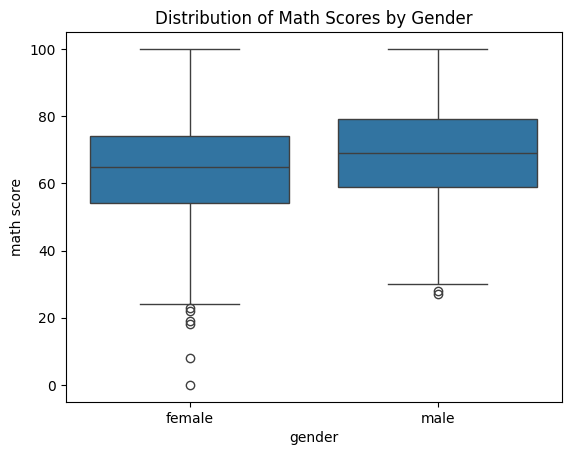

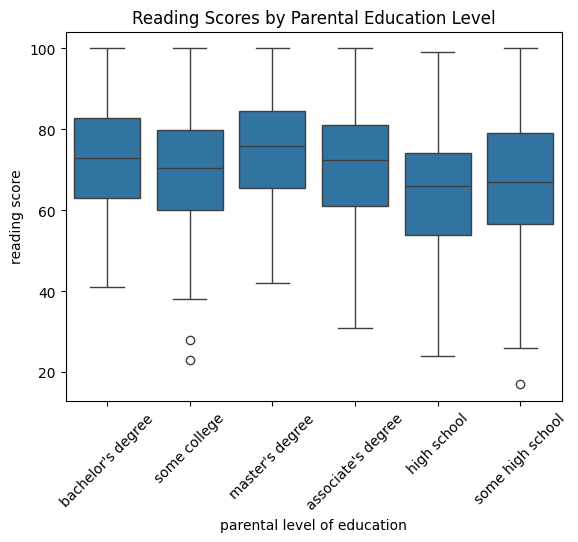

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first five rows to get a sense of the data structure
print(students_data.head())

# Generate a statistical summary to understand the data's distribution
print(students_data.describe())

# Visualize the distribution of math scores by gender to identify any disparities
sns.boxplot(x='gender', y='math score', data=students_data)
plt.title('Distribution of Math Scores by Gender')
plt.show()

# Explore the impact of parental education level on reading scores
sns.boxplot(x='parental level of education', y='reading score', data=students_data)
plt.title('Reading Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()


## Step 3: Data Cleaning and Preprocessing

Prior to any modeling or in-depth analysis, we must clean and preprocess the data to ensure it is in a usable format. This includes handling missing values, encoding categorical variables, and normalizing or scaling numerical variables if necessary.


In [ ]:
# Identify and handle any missing values
print(students_data.isnull().sum())

# Encode categorical variables numerically using one-hot encoding
students_data_encoded = pd.get_dummies(students_data)

# Isolate the features and target variables for analysis
features = students_data_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)
targets = students_data_encoded[['math score', 'reading score', 'writing score']]


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## Step 4: Analyzing Relationships Between Variables

In this step, we create a heatmap to visually understand the strength of relationships between variables in the dataset. The ‘coolwarm’ color scheme distinctly separates positive and negative correlations, allowing us to quickly identify significant relationships.



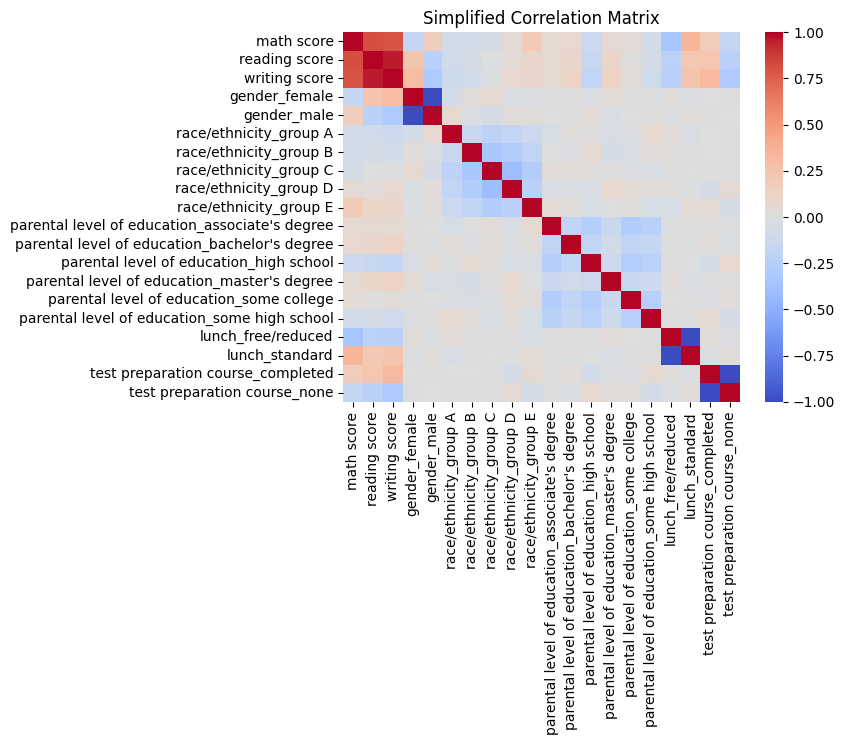

In [ ]:
# Heatmap displaying the dataset's correlation matrix with coolwarm color scheme.
sns.heatmap(students_data_encoded.corr(), cmap='coolwarm')
plt.title('Simplified Correlation Matrix')
plt.show()


## Step 5: Feature Engineering

In this step, we focus on enhancing our dataset by creating new features that could provide additional insights or improve the performance of predictive models. This involves generating composite scores, categorizing pass/fail status, and any other transformations that may uncover hidden patterns in the data.



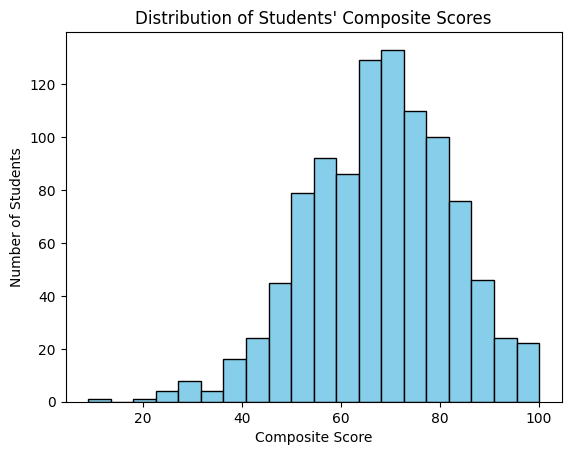

In [ ]:
# Code to visualize the distribution of the 'composite score' column
students_data_encoded['composite score'] = students_data_encoded[['math score', 'reading score', 'writing score']].mean(axis=1)

# Draw a histogram for the distribution of 'composite score'
plt.hist(students_data_encoded['composite score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Students\' Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Number of Students')
plt.show()
